In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint as pp
import csv
import datetime
from dateutil.parser import parse
from pandas.tools.plotting import scatter_matrix
from patsy import dmatrices
import statsmodels.formula.api as smf
from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm
import seaborn as sns
import statsmodels.api as sm
import matplotlib as mpl
from numpy.random import randn
from scipy import stats
from pprint import pprint as pp
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import cross_val_score
from sklearn import metrics, preprocessing
from IPython.display import display
import numexpr as ne
import urllib2
from pandas import Series
from pandas import merge, concat
%matplotlib inline

sns.set_palette("deep", desat=.8)
sns.set_context(rc={"figure.figsize": (14, 8)})
pd.set_option('mode.chained_assignment','warn')

In [2]:
url           = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data"

newrl         = urllib2.urlopen(url)
newdata_df    = pd.read_csv("data_heatmap.tsv", delimiter="\t")

newdata_df.describe()

,row_idx,col_idx,log2ratio
count,3000.000000,3000.000000,3000.000000
mean,25.500000,30.500000,-0.039000
std,14.433275,17.320989,1.028834
min,1.000000,1.000000,-10.000000
25%,13.000000,15.750000,0.000000
50%,25.500000,30.500000,0.000000
75%,38.000000,45.250000,0.000000
max,50.000000,60.000000,7.000000


In [3]:
cleve_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data"
newrl = urllib2.urlopen(cleve_url)
colus = list(range(1,15))
cleve_df = pd.read_csv("switz.data", header=None, delimiter="name\n")
# id_data = cleve_df[0].str.strip("[]").str.split(",").tolist()
# df_id = pd.DataFrame(id_data, columns=colus, index=cleve_df.index, dtype=int)
# cleve_df = cleve_df.join(df_id)
cleve_df.columns = ["name"]
r1 = cleve_df[0::10]
r2 = cleve_df[1::10]
r3 = cleve_df[2::10]
r4 = cleve_df[3::10]
r5 = cleve_df[4::10]
r6 = cleve_df[5::10]
r7 = cleve_df[6::10]
r8 = cleve_df[7::10]
r9 = cleve_df[8::10]
r10 = cleve_df[9::10]
# cleve_df

/usr/local/lib/python2.7/site-packages/pandas/io/parsers.py:639: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [4]:
cleve_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data"
newrl = urllib2.urlopen(cleve_url)
cleve_df = pd.read_csv(newrl, header=None)
# cleve_df = read_table(newrl, index_col=[0,1,2])
cleve_df.head()

,0
0,1 0 63 1 -9 -9 -9
1,-9 1 145 1 233 -9 50 20
2,1 -9 1 2 2 3 81 0
3,0 0 0 0 1 10.5 6 13
4,150 60 190 90 145 85 0 0


In [5]:
def all_models(df):
    models = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(max_depth=6), RandomForestClassifier(), KNeighborsClassifier(n_neighbors=11), SVC()]
    data = []
    x_all = df.iloc[:,1:]
    y_all = df.iloc[:,0]
    x_scaled = preprocessing.scale(x_all)
    for model in models:
        m = model
        avg_acc = np.mean(cross_val_score(m, x_scaled, y_all, scoring='accuracy'))
        avg_prec = np.mean(cross_val_score(m, x_scaled, y_all, scoring='precision'))
        avg_rec = np.mean(cross_val_score(m, x_scaled, y_all, scoring='recall'))
        avg_f1 = np.mean(cross_val_score(m, x_scaled, y_all, scoring='f1'))
            
        row = [avg_acc,avg_prec,avg_rec,avg_f1]
        row.append(np.mean(row))
        data.append(row)
    index=['Logistic', 'Gaussian', 'DecisionTree', 'RandomForest', 'KNN', 'SVC']
    columns = ['accuracy', 'precision', 'recall', 'F1', 'Avg']
    df = pd.DataFrame(data, index=index, columns=columns)
    return df

def create_df(filename):
    df = pd.read_csv(filename)
    df = df.replace(-9, np.nan)
    df = df.fillna(df.mean())
    df["num"] = df["num"].replace(2,1).replace(3,1).replace(4,1)
    drops = ["painloc", "painexer","years", "relrest", "rldv5", "id", "smoke", "ccf", "lvx1", "pncaden", "exeref", "earlobe", "thalpul", "exerwm", "restwm", "exerckm", "restckm", "restef", "lvx2", "lvx3", "lvx4", "lvf", "cathef", "junk","ekgmo", "ekgday", "proto", "dig", "prop", "nitr", "pro", "diuretic", "thalsev", "cmo", "cday", "lmt", "ladprox", "laddist", "diag","cxmain", "ramus", "om1", "om2", "rcaprox", "rcadist"]
    df = df.drop(drops, axis=1)
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df = df[cols]
    return df

def loc_dummies(df):
    dummies = pd.get_dummies(df['location'])
    atom_col = [c for c in dummies.columns if '*' not in c]
    for col in atom_col:
        df[col] = dummies[[c for c in dummies.columns if col in c]].sum(axis=1)
    df = df.drop(['location'], axis=1)
    return df

Switzerland                                           Hungary  \
                accuracy precision    recall        F1       Avg  accuracy   
Logistic        0.823442  0.934029  0.871120  0.896510  0.881275  0.853766   
Gaussian        0.616125  0.916284  0.621682  0.677467  0.707889  0.539884   
DecisionTree    0.790728  0.934795  0.888439  0.907006  0.880242  0.789137   
RandomForest    0.895257  0.939895  0.957040  0.957698  0.937473  0.809788   
KNN             0.935134  0.935134  1.000000  0.966449  0.959179  0.833426   
SVC             0.935134  0.935134  1.000000  0.966449  0.959179  0.857237   

                                                     LongBeach            \
             precision    recall        F1       Avg  accuracy precision   
Logistic      0.818964  0.764550  0.790079  0.806840  0.740087  0.814734   
Gaussian      0.450700  0.943915  0.604046  0.634637  0.659807  0.831046   
DecisionTree  0.702300  0.698677  0.704326  0.723610  0.639680  0.743073   
RandomForest  0.817821  0.622222  0.711069  0.740225  0.694859  0.782137   
KNN           0.828243  0.679365  0.746392  0.771857  0.735188  0.758123   
SVC           0.864583  0.717460  0.783207  0.805622  0.740012  0.743706   

                                           Cleveland                      \
                recall        F1       Avg  accuracy precision    recall   
Logistic      0.845442  0.829111  0.807344  0.808307  0.807442  0.766357   
Gaussian      0.683810  0.743911  0.729643  0.737798  0.815051  0.584785   
DecisionTree  0.792109  0.774652  0.737378  0.695127  0.654630  0.695122   
RandomForest  0.919320  0.819499  0.803954  0.779897  0.783583  0.751065   
KNN           0.946667  0.841601  0.820395  0.790763  0.771996  0.751452   
SVC           0.993333  0.850567  0.831905  0.804836  0.804160  0.750678   

                                  Combined                                \
                    F1       Avg  accuracy precision    recall        F1   
Logistic      0.772645  0.788688  0.745184  0.871909  0.674747  0.724275   
Gaussian      0.634432  0.693016  0.698406  0.893875  0.557576  0.623950   
DecisionTree  0.671803  0.679171  0.730699  0.791238  0.763636  0.774518   
RandomForest  0.696658  0.752801  0.687276  0.841778  0.604040  0.662918   
KNN           0.760358  0.768642  0.766436  0.845990  0.739394  0.766355   
SVC           0.768177  0.781963  0.786429  0.852577  0.773737  0.796584   

                        
                   Avg  
Logistic      0.754029  
Gaussian      0.693452  
DecisionTree  0.765023  
RandomForest  0.699003  
KNN           0.779544  
SVC           0.802332

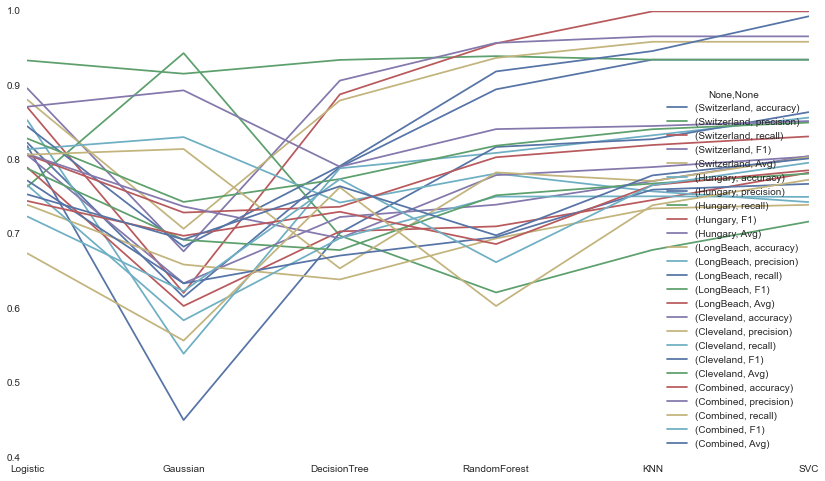

In [6]:
import functools

pd.set_option('display.max_columns', 50)

chdf = create_df("ch.csv")
hungdf = create_df("hung.csv")
lbdf = create_df("longbeach.csv")
clevedf = create_df("cleve.csv")
combineddf = create_df("total2.csv")

chdf = loc_dummies(chdf)
hungdf = loc_dummies(hungdf)
lbdf = loc_dummies(lbdf)
clevedf = loc_dummies(clevedf)
combineddf.to_csv("dftotal_loc.csv", index=False)
combineddf = combineddf.drop(["location"], axis=1)

ch_scores = all_models(chdf)
hung_scores = all_models(hungdf)
lb_scores = all_models(lbdf)
cleve_scores = all_models(clevedf)
combined_scores = all_models(combineddf)

ch_scores
# combineddf.to_csv("dftotal.csv", index=False)
# combineddf.to_json("dftotal.json", orient="records")
keys = ['Switzerland','Hungary', 'LongBeach', 'Cleveland', 'Combined']
thing = pd.concat([ch_scores, hung_scores, lb_scores, cleve_scores, combined_scores], axis=1, keys=keys)
thing.plot()
# thing.rename(columns=lambda x: x, inplace=True)
# thing.to_csv("../mcnulty_app/db/scores.csv", index=False)

# pd.pivot_table(
#   thing,values='cell_value',
#   index=['Logistic', 'Gaussian', 'DecisionTree', 'RandomForest', 'KNN', 'SVC'], #these stay as columns
#   columns=['Combined']) #data values in this column become their own column

# pd.concat([thing["Switzerland"].transpose(), thing["Hungary"].transpose()], axis=1)

thing
# combined_scores
# ch_scores
# hung_scores
# lb_scores

# chdf.transpose()
# chdf.pivot(index='date', columns='variable')
# ch_scores['Avg'].plot(label="Switzerland")
# hung_scores['Avg'].plot(label="Hungary")
# lb_scores['Avg'].plot(label="LongBeach")
# cleve_scores['Avg'].plot(label="Cleveland")

# plt.plot(combined_scores['Avg'], label="Combined")
# plt.plot(ch_scores['Avg'], label="CH")
# plt.plot(hung_scores['Avg'], label="Hung")
# plt.plot(lb_scores['Avg'], label="LB")
# plt.plot(cleve_scores['Avg'], label="Cleve")

In [7]:
train, test = train_test_split(combineddf, train_size = 0.8)
x_train  = train.iloc[:,1:]
y_train  = train.iloc[:,0]
x_test   = test.iloc[:,1:]
y_test   = test.iloc[:,0]
train.head(10)

,num,age,sex,cp,trestbps,htn,chol,cigs,fbs,dm,famhist,restecg,ekgyr,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,slope,rldv5e,ca,thal,cyr
62,0,45,1,4,140.00000,0,224,19.118998,0,0.957895,0.563941,0,83.000000,11.000000,5.690359,6.000000,144.000000,78.000000,180.000000,100.000000,140.00000,90.00000,0.000000,0.000000,0.00000,1.766497,22.000000,0.697595,5.018957,83
870,0,51,0,3,120.00000,0,295,0.000000,0,0.957895,0.000000,2,84.000000,9.000000,6.000000,10.000000,157.000000,80.000000,144.000000,80.000000,120.00000,78.00000,0.000000,0.000000,0.60000,1.000000,195.000000,0.000000,3.000000,84
650,0,59,1,4,135.00000,1,234,20.000000,0,0.957895,0.000000,0,81.000000,10.500000,6.000000,11.000000,161.000000,71.000000,175.000000,84.000000,135.00000,90.00000,0.000000,0.000000,0.50000,2.000000,176.000000,0.000000,7.000000,81
604,1,58,1,3,150.00000,1,219,20.000000,0,0.957895,1.000000,1,82.000000,1.700000,5.690359,2.000000,118.000000,70.000000,150.000000,100.000000,150.00000,100.00000,1.000000,0.000000,0.00000,1.766497,20.000000,0.697595,5.018957,82
6,0,45,0,2,130.00000,0,237,19.118998,0,0.957895,0.563941,0,84.000000,10.000000,5.690359,10.000000,170.000000,90.000000,200.000000,106.000000,130.00000,84.00000,0.000000,0.000000,0.00000,1.766497,11.000000,0.697595,5.018957,84
862,1,67,1,4,120.00000,0,237,2.000000,0,0.957895,0.000000,0,84.000000,6.300000,3.000000,7.000000,71.000000,49.000000,92.000000,56.000000,120.00000,68.00000,0.000000,1.000000,1.00000,2.000000,140.000000,0.000000,3.000000,84
530,1,72,1,4,132.10119,0,211,0.000000,0,0.957895,0.000000,0,84.056738,8.655872,5.690359,16.483123,137.298578,75.487544,171.641148,87.293062,132.10119,83.52381,0.390995,0.026159,0.87049,1.766497,54.914135,0.697595,5.018957,83
594,1,64,1,4,130.00000,1,258,0.000000,1,1.000000,0.000000,2,86.000000,9.000000,5.690359,9.000000,130.000000,72.000000,200.000000,80.000000,130.00000,80.00000,0.000000,0.000000,0.00000,1.766497,8.000000,0.697595,6.000000,86
546,0,48,1,4,132.10119,1,272,20.000000,0,0.957895,1.000000,1,84.056738,8.655872,5.690359,16.483123,137.298578,75.487544,171.641148,87.293062,132.10119,83.52381,0.390995,0.026159,0.87049,1.766497,54.914135,0.697595,5.018957,83
885,1,40,1,4,152.00000,1,223,25.000000,0,0.957895,0.000000,0,84.000000,12.000000,5.690359,13.000000,181.000000,58.000000,184.000000,86.000000,152.00000,90.00000,0.000000,0.000000,0.00000,1.000000,85.000000,0.000000,7.000000,84


AUC is: 0.878582


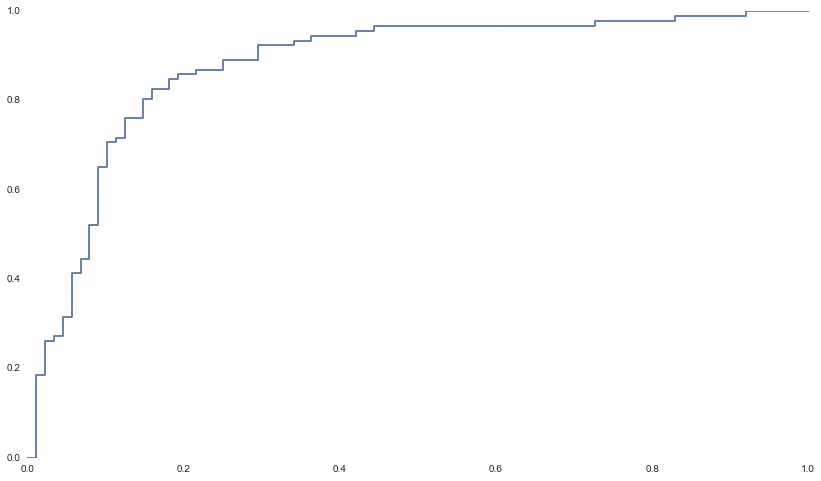

In [8]:
model = LogisticRegression()
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

AUC is: 0.747283


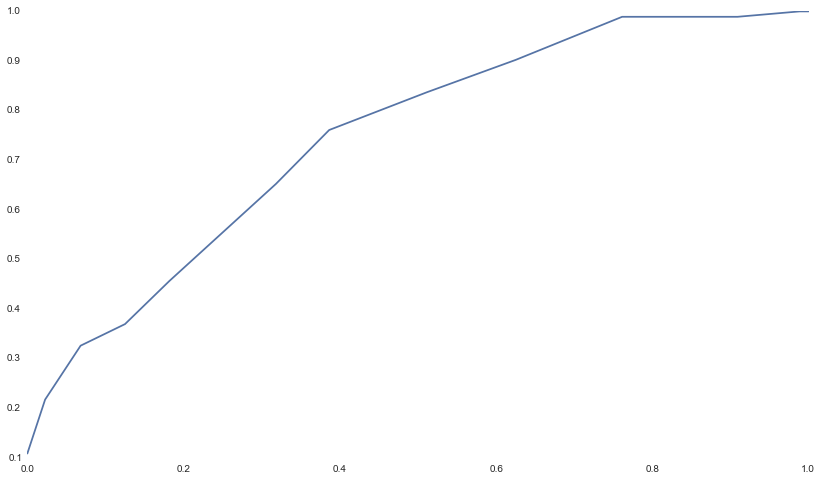

In [9]:
model = KNeighborsClassifier(n_neighbors=16)
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

AUC is: 0.873271


sklearn.naive_bayes.GaussianNB

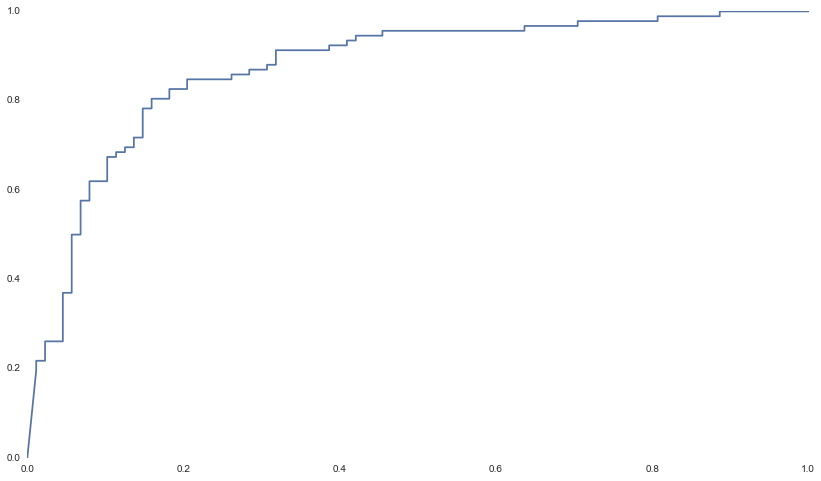

In [12]:
model = GaussianNB()
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
type(model)

AUC is: 0.731966


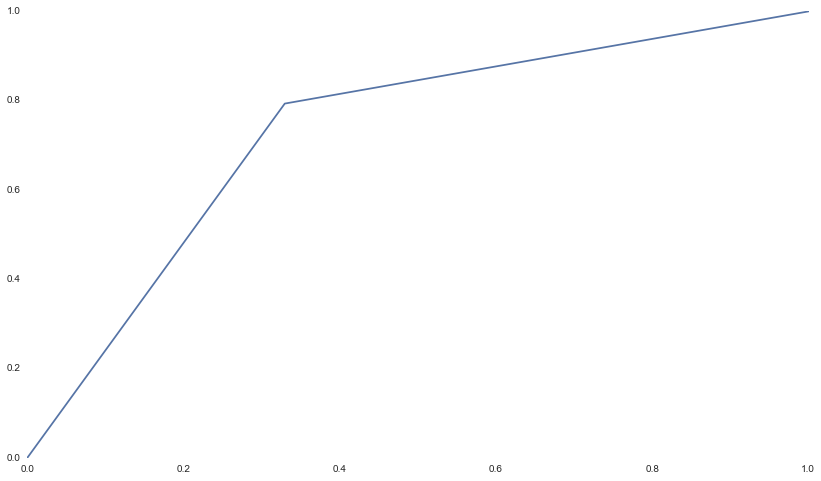

In [ ]:
model = DecisionTreeClassifier()
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

In [ ]:
model                   = SVC(kernel="linear", probability=True)
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

In [ ]:
model                   = RandomForestClassifier()
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

In [ ]:
combined_scores.plot()